# 2. Logistic Regression

## 2.1 逻辑回归
### Logistic函数 (Sigmoid)
### 为什么Sigmoid函数可以表示二分类概率？详见伯努利分布和指数分布族
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$
合起来，我们得到逻辑回归模型的假设函数：
$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta}^{T}}X}}}$$
### 损失函数
### 关于交叉熵详见Liu II
Binary Cross Entropy
$$loss=-(y\log{\hat{y}}+(1-y)\log{(1-\hat{y})})$$
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}{(y\log{h_{\theta}(x)}-(1-y)\log{(1-h_{\theta}(x))})}$$
### 梯度下降
$$\theta_{j}=\theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}}$$

In [47]:
import time

import matplotlib.pyplot as plt
import numpy as np

加载数据

In [ ]:
data = np.loadtxt(fname='ex2data1.txt',delimiter=",")
data

查看数据集

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
positive_data_idx= np.where(data[:,2]==1)
positive_data = data[positive_data_idx]
negative_data_idx= np.where(data[:, 2] == 0)
negative_data = data[negative_data_idx]
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
ax.set_title("Dataset")
plt.legend(loc=2)
plt.show()

划分训练集、验证集

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, :-1], data[:, -1], test_size=0.2)
# train_x, val_x, train_y, val_y = data[:, :-1], data[:, :-1], data[:, -1], data[:, -1]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x[:,0], y=train_x[:,1], s=10, label="Train")
ax.scatter(x=val_x[:,0], y=val_x[:,1], s=10, color="red", label="Validation")
ax.set_title('Dataset for Train and Validation')
ax.legend(loc=2)
plt.show()

查看训练集

In [ ]:
positive_train_data = train_x[np.where(train_y[:]==1)]
negative_train_data = train_x[np.where(train_y[:]==0)]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=positive_train_data[:,0], y=positive_train_data[:,1], s=10, label="Positive")
ax.scatter(x=negative_train_data[:,0], y=negative_train_data[:,1], s=10, label="Negative")
ax.set_title('Train Set')
ax.legend(loc=2)
plt.show()

查看验证集

In [ ]:
positive_val_data = val_x[np.where(val_y[:]==1)]
negative_val_data = val_x[np.where(val_y[:]==0)]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=positive_val_data[:,0], y=positive_val_data[:,1], s=10, label="Positive")
ax.scatter(x=negative_val_data[:,0], y=negative_val_data[:,1], s=10, label="Negative")
ax.legend(loc=2)
ax.set_title('Validation Set')
plt.show()

整理维度

In [ ]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)
val_y_ex.shape

进行逻辑回归，查看参数

In [ ]:
from LogisticRegression import LogisticRegression

epochs = 5000
alpha = 0.01
logistic_reg = LogisticRegression(x=train_x,y=train_y_ex,val_x=val_x,val_y=val_y_ex,epoch=epochs,lr=alpha)
theta,train_loss,val_loss = logistic_reg.train()
theta

查看准确率、损失和F1

In [ ]:
acc = logistic_reg.test(val_x,val_y_ex)
print("Accuracy on Test Set: {:.2f}%".format(acc * 100))
from sklearn.metrics import f1_score
f1 = f1_score(y_true=val_y_ex,y_pred=logistic_reg.predict(val_x))
print("My F1 Score: {:.4f}".format(f1))

调用库函数验证

In [ ]:
from sklearn.linear_model import LogisticRegression
sk_lr = LogisticRegression(max_iter=50000)
sk_lr.fit(train_x,train_y)
sk_pred = sk_lr.predict(val_x)
count = np.sum(np.equal(sk_pred,val_y))
sk_acc = count/val_y.shape[0]
sk_prob = sk_lr.predict_proba(val_x)

from LogisticRegression import bce_loss
sk_loss = bce_loss(sk_prob[:,1], val_y_ex)
sk_theta = np.array([[sk_lr.intercept_[0],sk_lr.coef_[0,0],sk_lr.coef_[0,1]]])
sk_f1 = f1_score(y_true=val_y_ex,y_pred=sk_pred)
print("Sklearn Accuracy: {:.2f}%".format(sk_acc * 100))
print("Sklearn Val Loss: {:.4f}".format(sk_loss))
print("SKlearn Parameters: ",sk_theta)
print("Sklearn F1 Score: {:.4f}".format(sk_f1))

决策边界可视化

In [ ]:
coef = -(theta / theta[0,2])  # find the
coef1 = -(sk_theta / sk_theta[0,2])
print(coef)

x = np.arange(data[:,0].min(), data[:,0].max(), step=1)
y = coef[0,0] + coef[0,1]*x
y1 = coef1[0,0] + coef[0,1]*x
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,y,label="My Prediction")
ax.plot(x,y1,label="Sklearn")
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, color="blue",label="negative")
ax.set_title("Decision Boundary")
plt.legend(loc=2)
plt.show()

画出训练过程

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,epochs+1), train_loss, 'r', label="Train Loss")
ax.plot(np.arange(1,epochs+1), val_loss, 'b', label="Val Loss")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train Curve')
plt.legend(loc=2)
plt.show()

## 2.2 正则化
### regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$
正则化项实现了对参数的缩小，使得某些导致过拟合的特征的参数变小。
从另一个角度来说，使得对损失不敏感的参数缩小较大，对损失敏感的参数缩小较小。详见Deep Learning

In [ ]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
data

查看数据集

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
positive_data_idx= np.where(data[:,2]==1)
positive_data = data[positive_data_idx]
negative_data_idx= np.where(data[:, 2] == 0)
negative_data = data[negative_data_idx]
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
ax.set_title("Dataset")
plt.legend(loc=2)
plt.show()

划分训练集和验证集

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, :-1], data[:, -1], test_size=0.2)
# train_x, val_x, train_y, val_y = data[:, :-1], data[:, :-1], data[:, -1], data[:, -1]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x[:,0], y=train_x[:,1], s=10, label="Train")
ax.scatter(x=val_x[:,0], y=val_x[:,1], s=10, color="red", label="Validation")
ax.set_title('Dataset for Train and Validation')
ax.legend(loc=2)
plt.show()

查看训练集

In [ ]:
positive_train_data = train_x[np.where(train_y[:]==1)]
negative_train_data = train_x[np.where(train_y[:]==0)]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=positive_train_data[:,0], y=positive_train_data[:,1], s=10, label="Positive")
ax.scatter(x=negative_train_data[:,0], y=negative_train_data[:,1], s=10, label="Negative")
ax.set_title('Train Set')
ax.legend(loc=2)
plt.show()

查看测试集

In [ ]:
plt.show()
positive_val_data = val_x[np.where(val_y[:] == 1)]
negative_val_data = val_x[np.where(val_y[:] == 0)]
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x=positive_val_data[:, 0], y=positive_val_data[:, 1], s=10, label="Positive")
ax.scatter(x=negative_val_data[:, 0], y=negative_val_data[:, 1], s=10, label="Negative")
ax.legend(loc=2)
ax.set_title('Validation Set')
plt.show()

整理维度

In [78]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)
val_y_ex.shape

(24, 1)

特征映射
$$\mathbf{X}=[x_{1}, x_{2}, x_{1}^{2}, x_{1}x_{2}, x_{2}^{2}, x_{1}^{3}, x_{1}^{2}x_{2},\cdots]$$

In [77]:
def feature_mapping(x, degree):
    feature = np.zeros([x.shape[0],1])
    for i in range(0, 1 + degree):
        for j in range(0, 1 + degree - i):
            if i==0 and j==0: continue
            feature=np.concatenate((feature, np.expand_dims(np.multiply(np.power(x[:, 0], i) , np.power(x[:, 1], j)), axis=1)),axis=1)
    return feature[:,1:]

train_x_map = feature_mapping(train_x,degree=6)
val_x_map = feature_mapping(val_x,degree=6)
train_x_map

array([[-3.96930000e-01,  1.57553425e-01, -6.25376809e-02, ...,
        -2.08050003e-05,  8.25812876e-06,  2.40880293e-06],
       [ 3.55990000e-01,  1.26728880e-01,  4.51142140e-02, ...,
        -3.88861210e-04, -1.38430702e-04,  8.08636887e-05],
       [-2.14180000e-01,  4.58730724e-02, -9.82509465e-03, ...,
        -1.28124784e-01,  2.74417662e-02,  8.49492941e-02],
       ...,
       [ 6.19150000e-01,  3.83346722e-01,  2.37349123e-01, ...,
         2.38817102e-03,  1.47863609e-03,  7.13967609e-04],
       [ 7.79970000e-01,  6.08353201e-01,  4.74497246e-01, ...,
         1.16547761e-05,  9.09037571e-06,  1.20172396e-06],
       [-2.58040000e-01,  6.65846416e-02, -1.71815009e-02, ...,
        -2.27442757e-01,  5.86893291e-02,  1.69140081e-01]])

训练逻辑回归

In [74]:
from LogisticRegression import LogisticRegression

epochs = 8000
alpha = 0.5
logistic_reg2 = LogisticRegression(x=train_x_map,y=train_y_ex,val_x=val_x_map,val_y=val_y_ex,epoch=epochs,lr=alpha,scale=2,regularize=None)
theta, loss, val_loss = logistic_reg2.train()

Epoch: 1/8000, Train Loss: 0.3392
Accuracy on Val set: 66.67%
Epoch: 2/8000, Train Loss: 0.2737
Accuracy on Val set: 62.50%
Epoch: 3/8000, Train Loss: 0.2490
Accuracy on Val set: 58.33%
Epoch: 4/8000, Train Loss: 0.2342
Accuracy on Val set: 58.33%
Epoch: 5/8000, Train Loss: 0.2240
Accuracy on Val set: 58.33%
Epoch: 6/8000, Train Loss: 0.2163
Accuracy on Val set: 58.33%
Epoch: 7/8000, Train Loss: 0.2103
Accuracy on Val set: 58.33%
Epoch: 8/8000, Train Loss: 0.2054
Accuracy on Val set: 58.33%
Epoch: 9/8000, Train Loss: 0.2012
Accuracy on Val set: 66.67%
Epoch: 10/8000, Train Loss: 0.1975
Accuracy on Val set: 66.67%
Epoch: 11/8000, Train Loss: 0.1943
Accuracy on Val set: 66.67%
Epoch: 12/8000, Train Loss: 0.1915
Accuracy on Val set: 66.67%
Epoch: 13/8000, Train Loss: 0.1889
Accuracy on Val set: 66.67%
Epoch: 14/8000, Train Loss: 0.1866
Accuracy on Val set: 66.67%
Epoch: 15/8000, Train Loss: 0.1844
Accuracy on Val set: 66.67%
Epoch: 16/8000, Train Loss: 0.1825
Accuracy on Val set: 66.67%
E

查看精度，损失和F1

In [75]:
acc = logistic_reg2.test(val_x_map,val_y_ex)
print("Accuracy on Test Set: {:.2f}%".format(acc * 100))
from sklearn.metrics import f1_score
f1 = f1_score(y_true=val_y_ex,y_pred=logistic_reg2.predict(val_x_map))
print("My F1 Score: {:.4f}".format(f1))

Accuracy on Test Set: 83.33%
My F1 Score: 0.8462


使用库函数验证

In [72]:
from sklearn.linear_model import LogisticRegression
sk_lr2 = LogisticRegression()
sk_lr2.fit(train_x_map,train_y)
sk_pred2 = sk_lr2.predict(val_x_map)
count2 = np.sum(np.equal(sk_pred2,val_y))
sk_acc2 = count2/val_y.shape[0]
sk_prob2 = sk_lr2.predict_proba(val_x_map)

from LogisticRegression import bce_loss
sk_loss2 = bce_loss(sk_prob2[:,1], val_y_ex)
sk_f12 = f1_score(y_true=val_y_ex,y_pred=sk_pred2)
print("Sklearn Accuracy: {:.2f}%".format(sk_acc2 * 100))
print("Sklearn Val Loss: {:.4f}".format(sk_loss2))
print("Sklearn F1 Score: {:.4f}".format(sk_f12))

Sklearn Accuracy: 83.33%
Sklearn Val Loss: 0.3295
Sklearn F1 Score: 0.8462


可视化决策边界

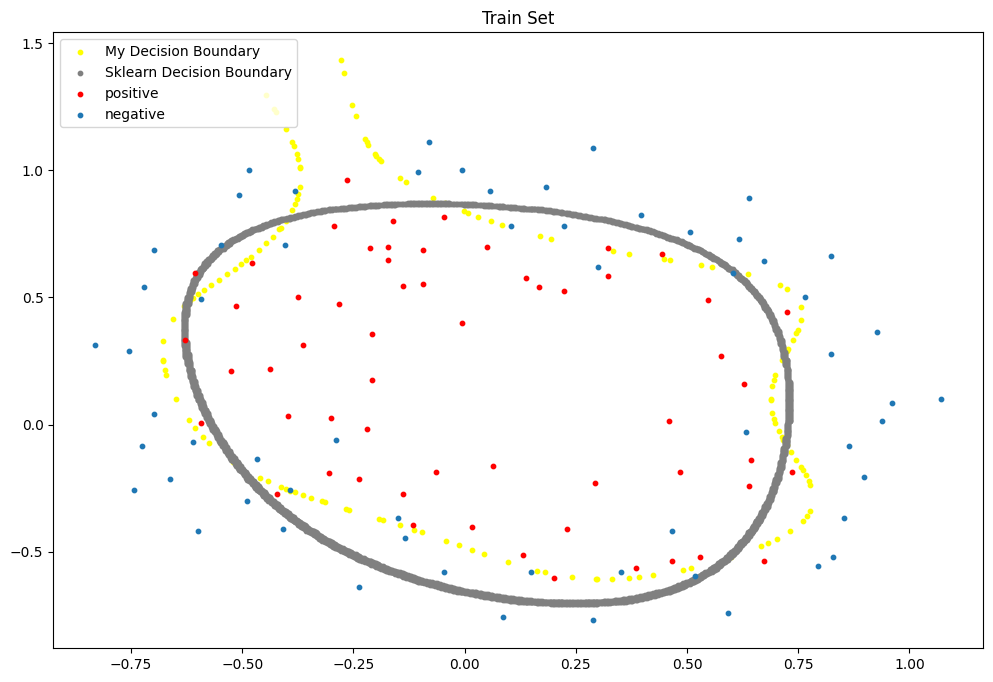

In [76]:
t1 = np.linspace(-1, 1.5, 700)
t2 = np.linspace(-1, 1.5, 700)

coordinates = np.array([[x, y] for x in t1 for y in t2])

mapped_cord_x = feature_mapping(np.array(coordinates), degree=6)  # this is a dataframe
prob = logistic_reg2.get_inner_product(mapped_cord_x)
sk_prob_coor = sk_lr2.predict_proba(mapped_cord_x)
idx1 = np.where(abs(prob[0,:])<5e-3)
idx2 = np.where(np.logical_and(sk_prob_coor[:,0] >= 0.495, sk_prob_coor[:,0] <= 0.505))
my_bd = coordinates[idx1]
sk_bd = coordinates[idx2]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=my_bd[:, 0], y=my_bd[:, 1], s=10, color="yellow", label="My Decision Boundary")
ax.scatter(x=sk_bd[:, 0], y=sk_bd[:, 1], s=10, color="gray", label="Sklearn Decision Boundary")
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
ax.set_title('Train Set')
ax.legend(loc=2)
plt.show()